# Introdução


Irei analisar o histórico de preços de casas vendidadas nos EUA, com a finalidade de responder as perguntas levantadas a seguir.

###Tendencia de mercados e Analise de preços
- Como os preços das propriedades mudaram ao longo do tempo?
- Qual a distibuição de preço das propridades ao longo do tempo?
- Quais as regiões mais caras?

# Código

In [11]:
#Importação das bibliotecas utilizadas para a análise
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')

In [2]:
#Importação e visualização da base de dados
df = pd.read_csv('USA Housing Dataset.csv')
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-09 00:00:00,376000.0,3.0,2.00,1340,1384,3.0,0,0,3,1340,0,2008,0,9245-9249 Fremont Ave N,Seattle,WA 98103,USA
1,2014-05-09 00:00:00,800000.0,4.0,3.25,3540,159430,2.0,0,0,3,3540,0,2007,0,33001 NE 24th St,Carnation,WA 98014,USA
2,2014-05-09 00:00:00,2238888.0,5.0,6.50,7270,130017,2.0,0,0,3,6420,850,2010,0,7070 270th Pl SE,Issaquah,WA 98029,USA
3,2014-05-09 00:00:00,324000.0,3.0,2.25,998,904,2.0,0,0,3,798,200,2007,0,820 NW 95th St,Seattle,WA 98117,USA
4,2014-05-10 00:00:00,549900.0,5.0,2.75,3060,7015,1.0,0,0,5,1600,1460,1979,0,10834 31st Ave SW,Seattle,WA 98146,USA


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4140 entries, 0 to 4139
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4140 non-null   object 
 1   price          4140 non-null   float64
 2   bedrooms       4140 non-null   float64
 3   bathrooms      4140 non-null   float64
 4   sqft_living    4140 non-null   int64  
 5   sqft_lot       4140 non-null   int64  
 6   floors         4140 non-null   float64
 7   waterfront     4140 non-null   int64  
 8   view           4140 non-null   int64  
 9   condition      4140 non-null   int64  
 10  sqft_above     4140 non-null   int64  
 11  sqft_basement  4140 non-null   int64  
 12  yr_built       4140 non-null   int64  
 13  yr_renovated   4140 non-null   int64  
 14  street         4140 non-null   object 
 15  city           4140 non-null   object 
 16  statezip       4140 non-null   object 
 17  country        4140 non-null   object 
dtypes: float

In [4]:
#Verificação da exitência de missing no conjunto de dados
df.isna().sum()

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
street           0
city             0
statezip         0
country          0
dtype: int64

In [5]:
#Verificando os valores das casas que são os nossos targets
df.price.describe()

count    4.140000e+03
mean     5.530629e+05
std      5.836865e+05
min      0.000000e+00
25%      3.200000e+05
50%      4.600000e+05
75%      6.591250e+05
max      2.659000e+07
Name: price, dtype: float64

Vamos melhorar a legibilidade dos preços convrtendo para milhares

In [7]:
df['price_in_k'] =df['price']/1000
df.price_in_k.describe()

count     4140.000000
mean       553.062877
std        583.686452
min          0.000000
25%        320.000000
50%        460.000000
75%        659.125000
max      26590.000000
Name: price_in_k, dtype: float64

Ao fazer a analise foi descoberto que existe algumas casas retornando o valor zero. com isso iremos considerar apenas as casas que contem valor.

In [8]:
df = df.query('price > 0')

###Como os preços das casas mudam ao longo do tempo?

In [10]:
#Conversão para transformar o campo para data
df['date'] = pd.to_datetime(df['date'])


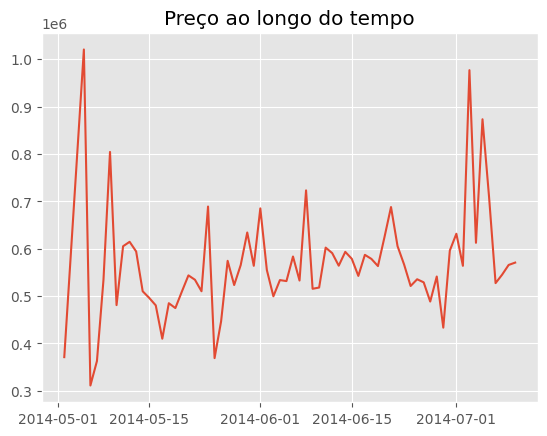

In [16]:
avg_price_per_date = df.groupby(['date'])['price'].mean()
_ = plt.plot(avg_price_per_date.index ,avg_price_per_date.values)
_ = plt.title('Preço ao longo do tempo')

Parece exixtir uma tendência média. Pode ser também que falte dados para poder tirar uma conclusão melhor. À principio, respondemos a questão concluindo que existe uma média.

###Qual a distribuição dos preços das propriedades ao longo do tempo?

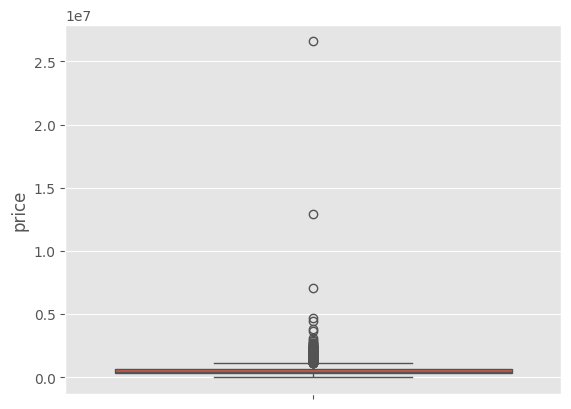

In [18]:
_ = sns.boxplot(df['price'])

In [19]:
df['price_in_k'].describe()

count     4091.000000
mean       559.687194
std        584.006025
min          7.800000
25%        325.093750
50%        464.600000
75%        660.000000
max      26590.000000
Name: price_in_k, dtype: float64

In [22]:
Q3 = 660.000000
Q1 = 325.093750
IQR = Q3-Q1

In [23]:
outlier_inf = Q1-1.5*IQR
outlier_sup = Q3+1.5*IQR

In [24]:
df[df['price_in_k'] >outlier_sup]

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_basement,yr_built,yr_renovated,street,city,statezip,country,price_in_k,year,month
2,2014-05-09,2.238888e+06,5.0,6.50,7270,130017,2.0,0,0,3,...,850,2010,0,7070 270th Pl SE,Issaquah,WA 98029,USA,2238.888000,2014,5
11,2014-05-12,1.225000e+06,4.0,4.50,5420,101930,1.0,0,0,3,...,1530,2001,0,25005 NE Patterson Way,Redmond,WA 98053,USA,1225.000000,2014,5
18,2014-05-12,1.200000e+06,3.0,1.75,1560,8078,1.5,1,4,4,...,0,1928,0,3603 W Mercer Way,Mercer Island,WA 98040,USA,1200.000000,2014,5
22,2014-05-12,1.575000e+06,5.0,2.75,3650,20150,1.0,0,0,4,...,1290,1975,0,1216 86th Ave NE,Bellevue,WA 98004,USA,1575.000000,2014,5
28,2014-05-12,1.315000e+06,4.0,3.50,3460,3997,2.0,0,0,3,...,900,2004,2003,2346 N 59th St,Seattle,WA 98103,USA,1315.000000,2014,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3888,2014-05-05,2.199900e+06,4.0,1.50,1120,5427,1.0,0,0,3,...,0,1969,2014,19009-19021 SE 266th St,Covington,WA 98042,USA,2199.900000,2014,5
3890,2014-07-03,2.659000e+07,3.0,2.00,1180,7793,1.0,0,0,4,...,0,1992,0,12005 SE 219th Ct,Kent,WA 98031,USA,26590.000000,2014,7
4005,2014-06-05,2.560498e+06,3.0,2.50,1710,1664,2.0,0,0,5,...,410,2003,0,2826 21st Ave W,Seattle,WA 98199,USA,2560.498333,2014,6
4007,2014-06-06,1.337044e+06,4.0,3.50,4280,9583,2.0,0,0,3,...,0,2005,0,1415 108th Ave SE,Bellevue,WA 98004,USA,1337.044200,2014,6


Temos cerca de 216 outliers (~5%) superiores.

###Quais as regiões mais caras?

Irei verificar quais são as 10 cidades mais caras.

In [27]:
cities_count = df.groupby('city')['price'].count()
cities_over_30 = cities_count[cities_count>30].index #Lista de ccidades com amostras suficientes

In [29]:
df[df['city'].isin(cities_over_30)].groupby('city')['price_in_k'].mean().sort_values(ascending=False).head(10)

city
Mercer Island    1169.036563
Bellevue          878.531332
Sammamish         695.334267
Newcastle         673.142419
Redmond           662.916233
Kirkland          658.193860
Woodinville       612.831642
Issaquah          603.676489
Seattle           582.622197
Snoqualmie        557.042476
Name: price_in_k, dtype: float64